In [8]:
import pandas as pd
import numpy as np
import seaborn as sns

In [9]:
import matplotlib.pyplot as plt

In [13]:
df = pd.read_csv("C:/Users/HP/OneDrive/Documents/Hackathon_Working_Data.csv")


In [14]:
df.head()

,MONTH,STORECODE,DAY,BILL_ID,BILL_AMT,QTY,VALUE,PRICE,GRP,SGRP,SSGRP,CMP,MBRD,BRD
0,M1,N1,4,T375,225.0,1.0,225.0,225.0,BUTTER MARGR (4/94),BUTTER,SALTED,G C M M F,AMUL,AMUL
1,M1,N1,4,T379,95.0,1.0,95.0,95.0,CONFECTIONERY - ECLAIRS,CONFECTIONERY - ECLAIRS,CONFECTIONERY - ECLAIRS,PARLE PRODS,MELODY,MELODY CHOCOLATY
2,M1,N1,4,T381,10.0,1.0,10.0,10.0,CHOCOLATE,CHOCOLATE PANNED,CHOCOLATE PANNED,MONDELEZ INTERNATIONAL,CADBURY SHOTS,CADBURY SHOTS
3,M1,N1,4,T382,108.0,1.0,108.0,108.0,PACKAGED TEA,MAIN PACKS,MAIN PACKS,GUJ TEA PROCESSORS,WAGH BAKRI,WAGH BAKRI INSTANT
4,M1,N1,4,T384,19.0,1.0,19.0,19.0,ALL IODISED SALT,POWDERED SALT,POWDERED SALT,TATA CHEM,TATA,TATA SALT


In [15]:
df.describe()


,DAY,BILL_AMT,QTY,VALUE,PRICE
count,26985.000000,26985.000000,26985.000000,26985.000000,26985.000000
mean,15.167019,278.754206,4.105021,67.808551,52.812982
std,8.956057,541.398504,95.666947,118.005978,84.987730
min,1.000000,0.000000,0.500000,0.000000,0.000000
25%,7.000000,40.000000,1.000000,10.000000,10.000000
50%,14.000000,111.000000,1.000000,30.000000,22.000000
75%,23.000000,280.000000,2.000000,80.000000,64.000000
max,31.000000,7292.000000,12000.000000,3150.000000,3150.000000


In [16]:
df.shape

(26985, 14)

In [17]:
df['STORECODE'].unique

<bound method Series.unique of 0         N1
1         N1
2         N1
3         N1
4         N1
        ... 
26980    N10
26981    N10
26982    N10
26983    N10
26984    N10
Name: STORECODE, Length: 26985, dtype: object>

In [18]:
df.isnull().sum()

MONTH        0
STORECODE    0
DAY          0
BILL_ID      0
BILL_AMT     0
QTY          0
VALUE        0
PRICE        0
GRP          0
SGRP         0
SSGRP        0
CMP          0
MBRD         0
BRD          0
dtype: int64

In [19]:
df['AMOUNT']=df['VALUE']*df['QTY']
selected=['VALUE','QTY','AMOUNT']
print(df[selected])

       VALUE  QTY  AMOUNT
0      225.0  1.0   225.0
1       95.0  1.0    95.0
2       10.0  1.0    10.0
3      108.0  1.0   108.0
4       19.0  1.0    19.0
...      ...  ...     ...
26980   10.0  1.0    10.0
26981   10.0  1.0    10.0
26982   20.0  2.0    40.0
26983   58.0  1.0    58.0
26984   15.0  1.0    15.0

[26985 rows x 3 columns]


In [20]:
df['UID']=df['STORECODE'].str.cat(df['BILL_ID'])
df.head()

,MONTH,STORECODE,DAY,BILL_ID,BILL_AMT,QTY,VALUE,PRICE,GRP,SGRP,SSGRP,CMP,MBRD,BRD,AMOUNT,UID
0,M1,N1,4,T375,225.0,1.0,225.0,225.0,BUTTER MARGR (4/94),BUTTER,SALTED,G C M M F,AMUL,AMUL,225.0,N1T375
1,M1,N1,4,T379,95.0,1.0,95.0,95.0,CONFECTIONERY - ECLAIRS,CONFECTIONERY - ECLAIRS,CONFECTIONERY - ECLAIRS,PARLE PRODS,MELODY,MELODY CHOCOLATY,95.0,N1T379
2,M1,N1,4,T381,10.0,1.0,10.0,10.0,CHOCOLATE,CHOCOLATE PANNED,CHOCOLATE PANNED,MONDELEZ INTERNATIONAL,CADBURY SHOTS,CADBURY SHOTS,10.0,N1T381
3,M1,N1,4,T382,108.0,1.0,108.0,108.0,PACKAGED TEA,MAIN PACKS,MAIN PACKS,GUJ TEA PROCESSORS,WAGH BAKRI,WAGH BAKRI INSTANT,108.0,N1T382
4,M1,N1,4,T384,19.0,1.0,19.0,19.0,ALL IODISED SALT,POWDERED SALT,POWDERED SALT,TATA CHEM,TATA,TATA SALT,19.0,N1T384


In [26]:
id_store=df.groupby('STORECODE')['UID'].unique()
for store_code, uids in id_store.items():
    print(f"Store Code: {store_code},UIDs:{uids}")

Store Code: N1,UIDs:['N1T375' 'N1T379' 'N1T381' ... 'N1T9243' 'N1T9251' 'N1T9255']
Store Code: N10,UIDs:['N10T3' 'N10T17' 'N10T25' ... 'N10T5999' 'N10T6007' 'N10T6013']
Store Code: N2,UIDs:['N2T2' 'N2T3' 'N2T4' 'N2T5' 'N2T6' 'N2T7' 'N2T9' 'N2T10' 'N2T12' 'N2T13'
 'N2T14' 'N2T15' 'N2T18' 'N2T19' 'N2T20' 'N2T21' 'N2T22' 'N2T23' 'N2T24'
 'N2T25' 'N2T26' 'N2T28' 'N2T29' 'N2T31' 'N2T32' 'N2T33' 'N2T34' 'N2T35'
 'N2T36' 'N2T37' 'N2T38' 'N2T39' 'N2T40' 'N2T41' 'N2T42' 'N2T43' 'N2T46'
 'N2T47' 'N2T48' 'N2T49' 'N2T50' 'N2T51' 'N2T57' 'N2T58' 'N2T59' 'N2T60'
 'N2T62' 'N2T63' 'N2T64' 'N2T65' 'N2T66' 'N2T67' 'N2T69' 'N2T72' 'N2T74'
 'N2T75' 'N2T77' 'N2T79' 'N2T80' 'N2T81' 'N2T82' 'N2T83' 'N2T84' 'N2T87'
 'N2T88' 'N2T89' 'N2T90' 'N2T91' 'N2T93' 'N2T95' 'N2T97' 'N2T99' 'N2T100'
 'N2T101' 'N2T102' 'N2T103' 'N2T105' 'N2T106' 'N2T107' 'N2T108' 'N2T109'
 'N2T110' 'N2T111' 'N2T112' 'N2T113' 'N2T114' 'N2T115' 'N2T117' 'N2T118'
 'N2T122' 'N2T123' 'N2T125' 'N2T126' 'N2T128' 'N2T131' 'N2T132' 'N2T134'
 'N2T1

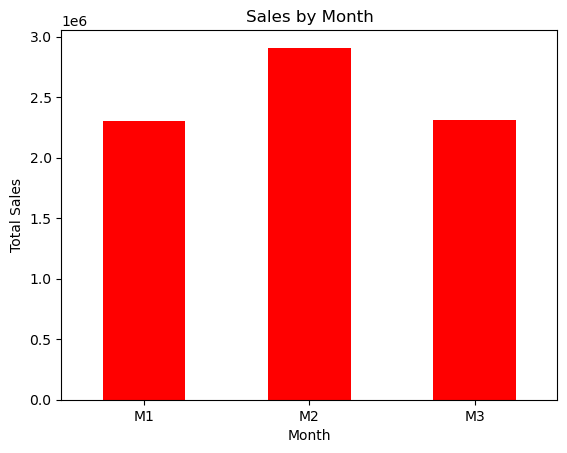

In [30]:
monthly_sales = df.groupby('MONTH')['BILL_AMT'].sum()
monthly_sales.plot(kind='bar', color='red')
plt.title('Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.show()

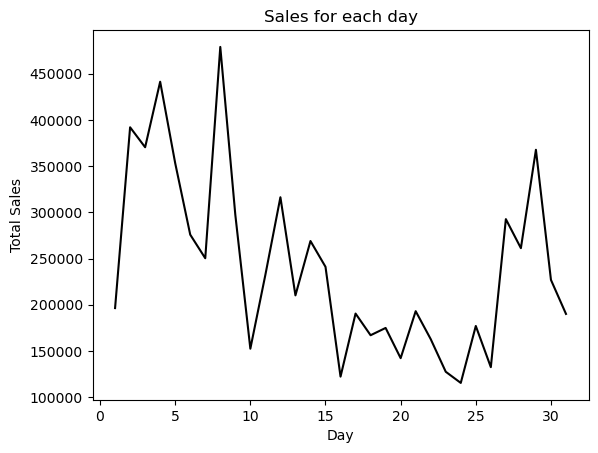

In [31]:
daily_sales = df.groupby('DAY')['BILL_AMT'].sum()
daily_sales.plot(kind='line', color='black')
plt.title('Sales for each day')
plt.xlabel('Day')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.show()

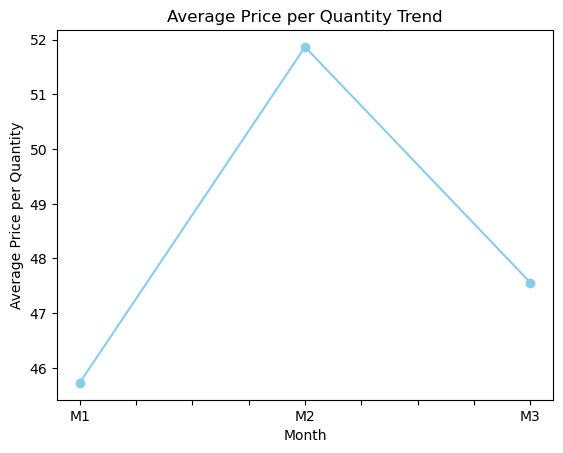

In [32]:
df['Avg_Price_Per_Qty'] = df['PRICE'] / df['QTY']
average_price_per_qty = df.groupby('MONTH')['Avg_Price_Per_Qty'].mean()
average_price_per_qty.plot(kind='line', marker='o', color='skyblue')
plt.title('Average Price per Quantity Trend')
plt.xlabel('Month')
plt.ylabel('Average Price per Quantity')
plt.show()

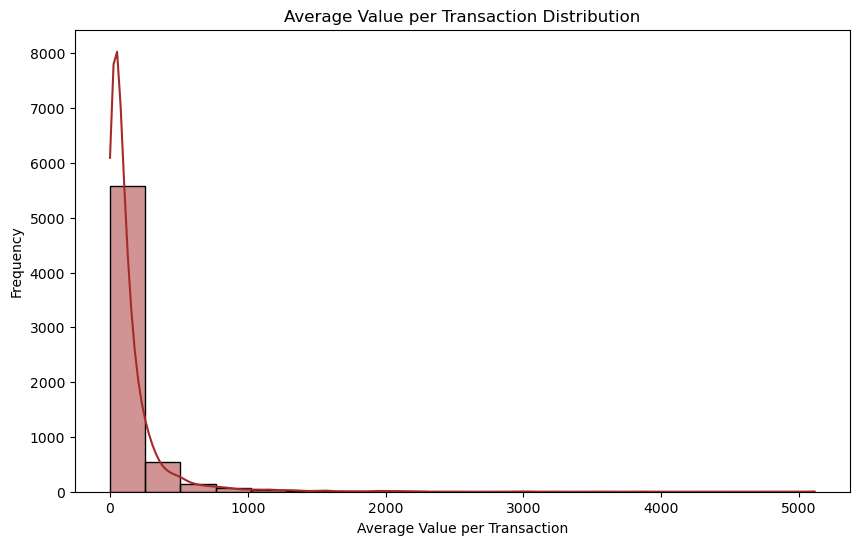

In [35]:
import seaborn as sns
average_value_per_transaction = df.groupby('BILL_ID')['BILL_AMT'].mean()
plt.figure(figsize=(10, 6))
sns.histplot(average_value_per_transaction, bins=20, kde=True, color='brown')
plt.title('Average Value per Transaction Distribution')
plt.xlabel('Average Value per Transaction')
plt.ylabel('Frequency')
plt.show()

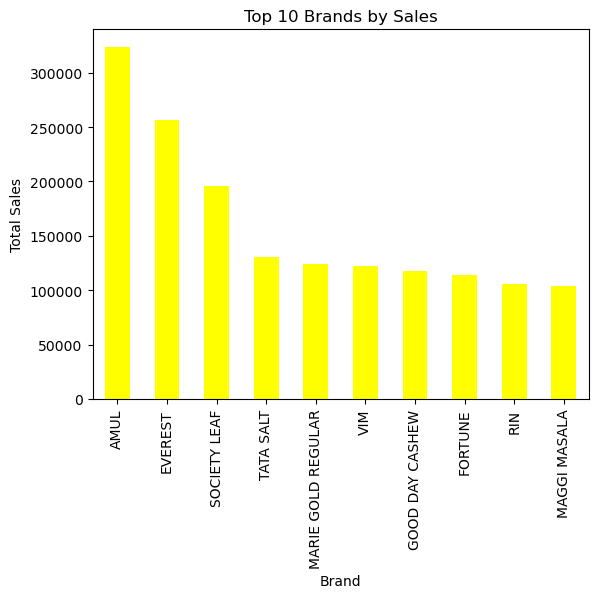

In [36]:
brand_wise_sales = df.groupby('BRD')['BILL_AMT'].sum().nlargest(10)
brand_wise_sales.plot(kind='bar', color='yellow')
plt.title('Top 10 Brands by Sales')
plt.xlabel('Brand')
plt.ylabel('Total Sales')
plt.show()

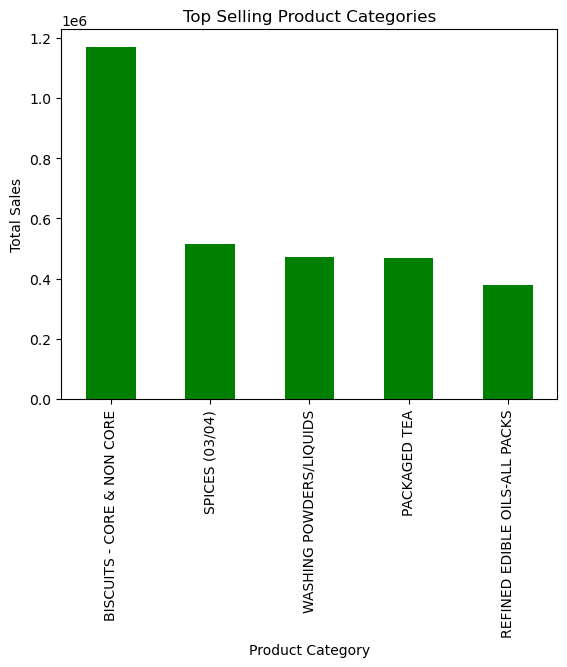

In [37]:
top_categories = df.groupby('GRP')['BILL_AMT'].sum().nlargest(5)
top_categories.plot(kind='bar', color='green')
plt.title('Top Selling Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.show()

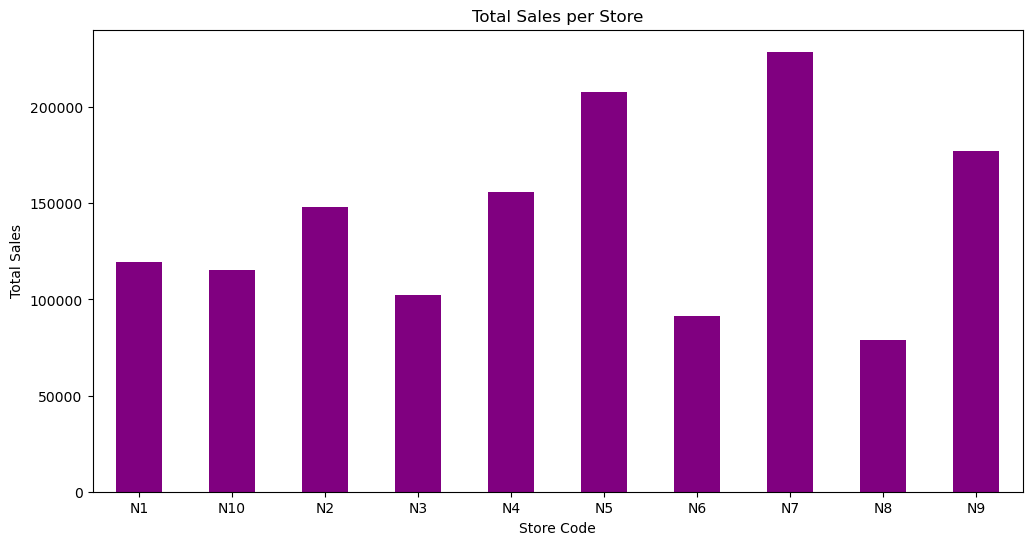

In [38]:
total_sales_per_store = df.groupby('STORECODE')['PRICE'].sum()
plt.figure(figsize=(12, 6))
total_sales_per_store.plot(kind='bar', color='purple')
plt.title('Total Sales per Store')
plt.xlabel('Store Code')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.show()

In [39]:
total_sales_per_store = df.groupby('STORECODE')['PRICE'].sum()
for store_code, total_sales in total_sales_per_store.items():
    print(f"Store Code: {store_code}, Total Sales: {total_sales}")

Store Code: N1, Total Sales: 119254.4
Store Code: N10, Total Sales: 115325.0
Store Code: N2, Total Sales: 148303.1
Store Code: N3, Total Sales: 102414.79
Store Code: N4, Total Sales: 155969.23
Store Code: N5, Total Sales: 207912.0
Store Code: N6, Total Sales: 91198.0
Store Code: N7, Total Sales: 228852.28
Store Code: N8, Total Sales: 78686.52
Store Code: N9, Total Sales: 177243.01


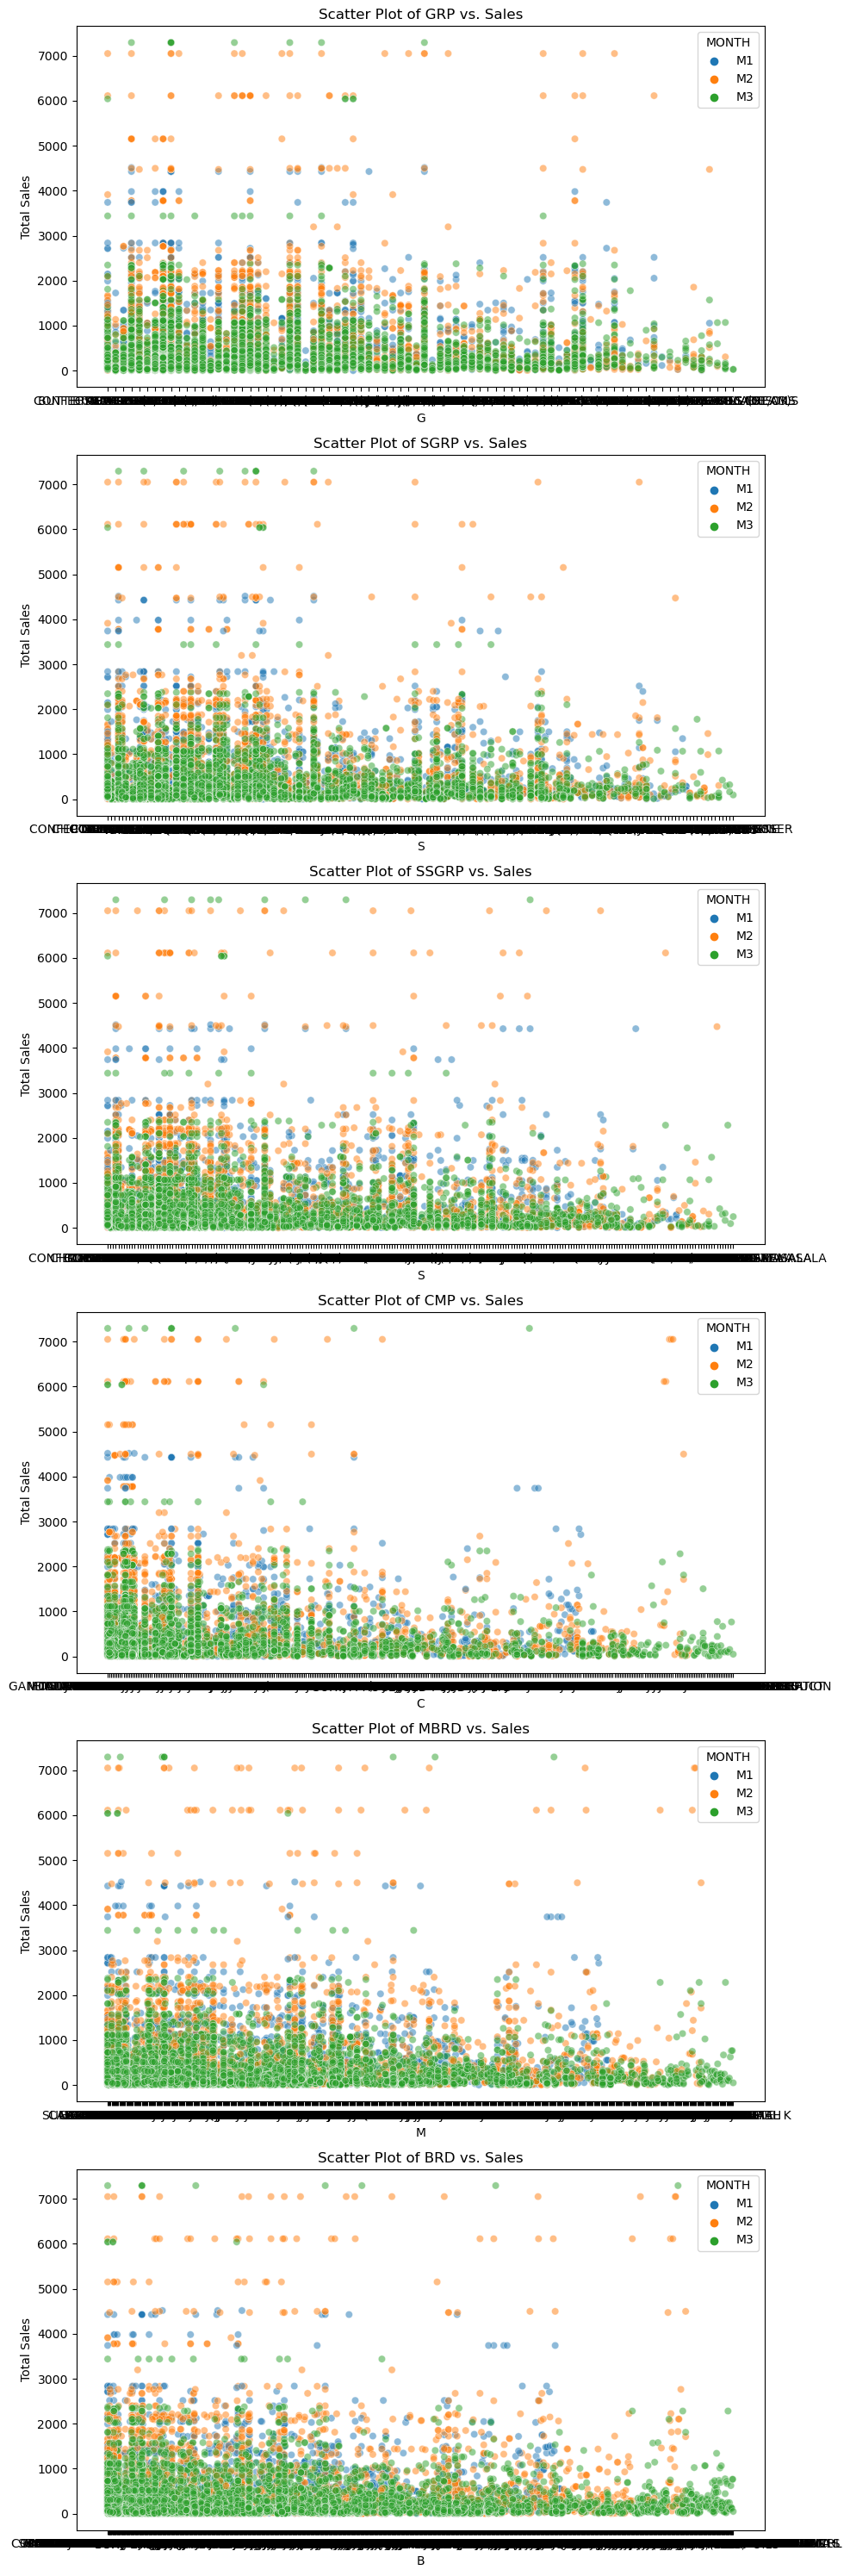

In [40]:
import seaborn as sns
scatter_columns = ['GRP', 'SGRP', 'SSGRP', 'CMP', 'MBRD', 'BRD']
fig, axes = plt.subplots(nrows=len(scatter_columns), figsize=(10, 5 * len(scatter_columns)))
for i, column in enumerate(scatter_columns):
    sns.scatterplot(x=column, y='BILL_AMT', hue='MONTH', data=df, ax=axes[i], alpha=0.5)
    axes[i].set_title(f'Scatter Plot of {column} vs. Sales')
    axes[i].set_xlabel(column[0])
    axes[i].set_ylabel('Total Sales')
plt.tight_layout()
plt.show()